# Data Understanding and Exploration

## Import necessary modules

In [5]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("../") 
import pandas as pd

# Import custom modules
from src.data.data_ingestion import ingest_raw_data
from src.utils.visualization import plot_feature_distribution

## Data Loading

### Ingest raw data from MySql database

In [6]:
raw_data = ingest_raw_data()

[2023-09-07 20:06:37,028] 26 src.utils.logger - INFO - Started data ingestion process...
[2023-09-07 20:06:37,031] 29 src.utils.logger - INFO - Data already ingested to CSV: /home/umar/Workspace/personal/msc-dissertation/src/data/../../data/raw/raw.csv


### Load raw data into a data frame

In [7]:
# Load the dataset
data = pd.read_csv(raw_data)

# Display the first few rows to inspect the structure
data.head()

/tmp/ipykernel_6055/3295681787.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(raw_data)


,ID,Jira_ID,Issue_Key,URL,Title,Description,Description_Text,Description_Code,Type,Priority,...,Resolution_Time_Minutes,Title_Changed_After_Estimation,Description_Changed_After_Estimation,Story_Point_Changed_After_Estimation,Pull_Request_URL,Creator_ID,Reporter_ID,Assignee_ID,Project_ID,Sprint_ID
0,65,77638,XD-3768,https://jira.spring.io/rest/api/2/issue/77638,"""How do I make a job restartable in spring xd""","""The jobs that appear under Executions section...","""""""The jobs that appear under Executions secti...",NaN,Bug,Major,...,0.0,0,0,0,NaN,68.0,68.0,NaN,1,NaN
1,66,77511,XD-3767,https://jira.spring.io/rest/api/2/issue/77511,"""admin config timezone command does not work""","""Working with Spring-XD version 1.3.2.RELEASE ...","""""""Working with Spring-XD version 1.3.2.RELEAS...",""" xd:>admin config admin config info ad...",Bug,Trivial,...,0.0,0,0,0,NaN,69.0,69.0,NaN,1,NaN
2,67,77130,XD-3766,https://jira.spring.io/rest/api/2/issue/77130,"""Module Upload command not pushing jar to all ...","""My project 7 node cluster and in that 2 node ...","""""""My project 7 node cluster and in that 2 nod...",NaN,Bug,Major,...,0.0,0,0,0,NaN,70.0,70.0,NaN,1,NaN
3,68,71950,XD-3765,https://jira.spring.io/rest/api/2/issue/71950,"""Fix stream failover ""","""See https://github.com/spring-projects/spring...","""""""See https://github.com/spring-projects/spri...",NaN,Story,Minor,...,0.0,1,0,0,NaN,72.0,72.0,71.0,1,NaN
4,69,71805,XD-3764,https://jira.spring.io/rest/api/2/issue/71805,"""SpringXD Job is still executing even after fo...","""I'm trying to run a Job on SpringXD and the j...","""""""I'm trying to run a Job on SpringXD and the...",NaN,Bug,Major,...,0.0,0,0,0,NaN,73.0,73.0,NaN,1,NaN


## Understanding the dataset

In [8]:
# Describe the dataset attributes
data.describe()

,ID,Jira_ID,Story_Point,Timespent,In_Progress_Minutes,Total_Effort_Minutes,Resolution_Time_Minutes,Title_Changed_After_Estimation,Description_Changed_After_Estimation,Story_Point_Changed_After_Estimation,Creator_ID,Reporter_ID,Assignee_ID,Project_ID,Sprint_ID
count,458232.000000,4.582320e+05,6.542700e+04,10243.000000,4.582320e+05,4.582320e+05,4.582320e+05,458232.000000,458232.0,458232.000000,456641.000000,455736.000000,261831.000000,458232.000000,43475.000000
mean,250427.756628,6.842263e+05,4.135718e+02,323.090501,5.238023e+03,2.343935e+04,4.084872e+05,0.141330,0.0,0.020068,120547.190712,120825.496105,133827.102066,24.998507,2711.075791
std,154217.334318,2.121512e+06,1.044232e+05,761.792096,5.792574e+04,1.286546e+05,8.887023e+05,0.348362,0.0,0.140235,62373.774892,62234.714879,60001.012434,10.805999,1512.380726
min,65.000000,1.000000e+04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,68.000000,68.000000,71.000000,1.000000,1.000000
25%,114626.750000,5.834075e+04,1.000000e+00,46.000000,0.000000e+00,0.000000e+00,4.000000e+00,0.000000,0.0,0.000000,73529.000000,74305.000000,116063.000000,18.000000,1395.500000
50%,229184.500000,1.471675e+05,3.000000e+00,120.000000,0.000000e+00,0.000000e+00,1.535700e+04,0.000000,0.0,0.000000,145748.000000,145748.000000,151325.000000,23.000000,2941.000000
75%,394473.250000,6.167282e+05,5.000000e+00,300.000000,0.000000e+00,1.458000e+03,2.634485e+05,0.000000,0.0,0.000000,164408.000000,164408.000000,166050.000000,34.000000,4053.000000
max,509035.000000,1.333610e+07,2.671011e+07,24622.000000,4.771423e+06,4.806555e+06,9.156071e+06,1.000000,0.0,1.000000,209125.000000,209125.000000,208978.000000,44.000000,5027.000000


In [9]:
# Describe concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458232 entries, 0 to 458231
Data columns (total 30 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    458232 non-null  int64  
 1   Jira_ID                               458232 non-null  int64  
 2   Issue_Key                             458232 non-null  object 
 3   URL                                   458232 non-null  object 
 4   Title                                 458232 non-null  object 
 5   Description                           429104 non-null  object 
 6   Description_Text                      429104 non-null  object 
 7   Description_Code                      59005 non-null   object 
 8   Type                                  458232 non-null  object 
 9   Priority                              331573 non-null  object 
 10  Status                                458232 non-null  object 
 11  

In [10]:
# Describe the shape of the dataset
data.shape

(458232, 30)

In [11]:
# Describe the data type of each column in the dataset
data.dtypes

ID                                        int64
Jira_ID                                   int64
Issue_Key                                object
URL                                      object
Title                                    object
Description                              object
Description_Text                         object
Description_Code                         object
Type                                     object
Priority                                 object
Status                                   object
Resolution                               object
Creation_Date                            object
Estimation_Date                          object
Resolution_Date                          object
Last_Updated                             object
Story_Point                             float64
Timespent                               float64
In_Progress_Minutes                     float64
Total_Effort_Minutes                    float64
Resolution_Time_Minutes                 

## Exploratory Data Analysis (EDA)

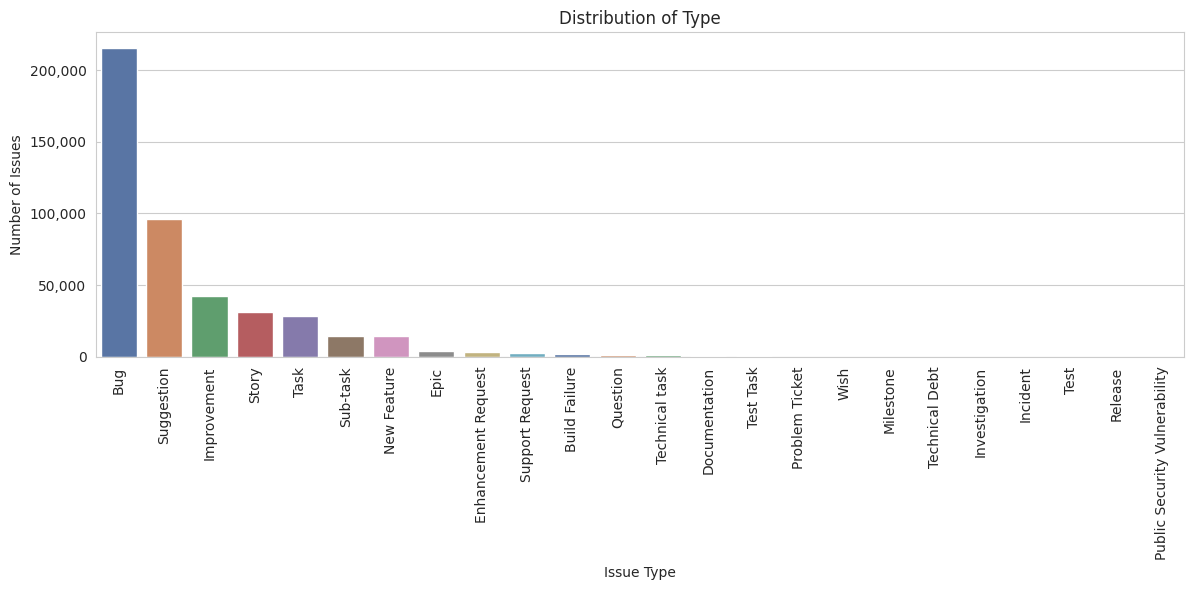

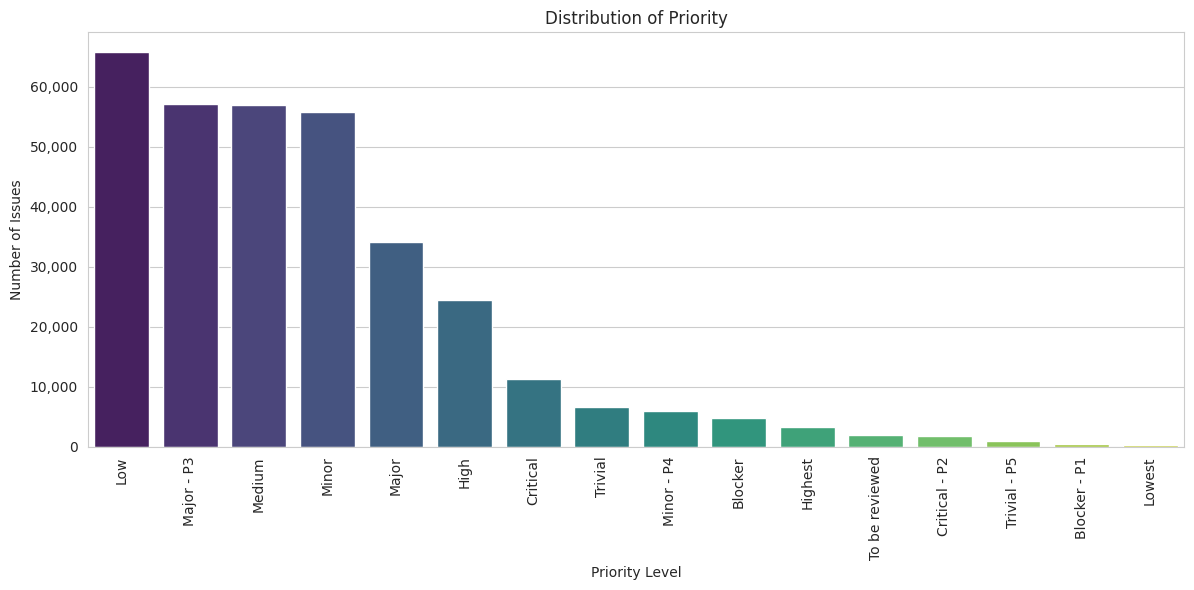

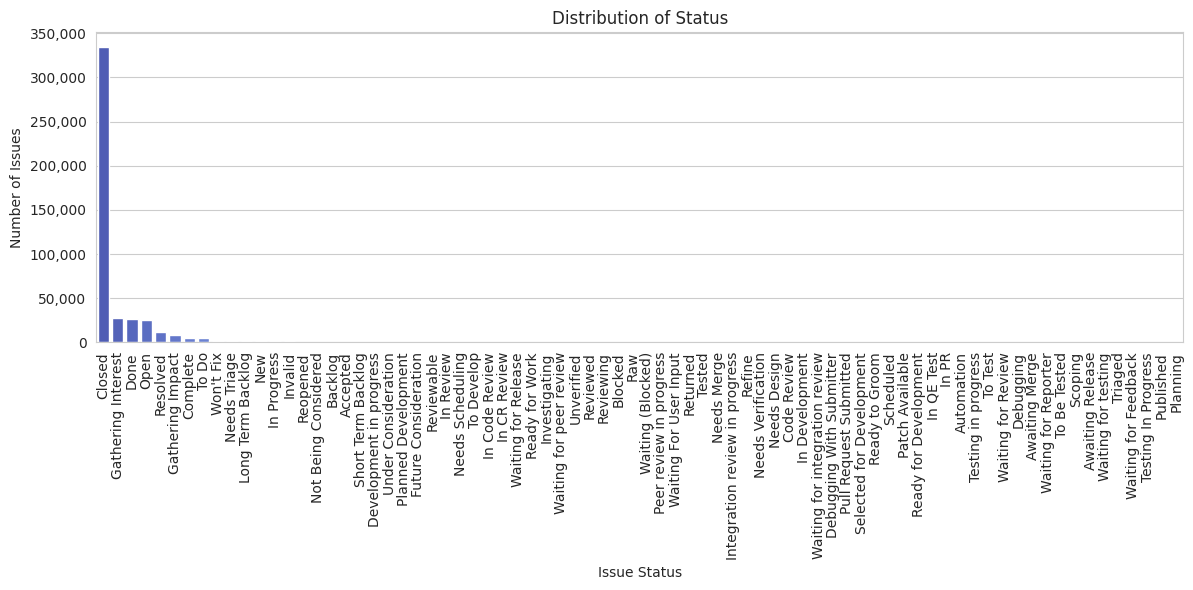

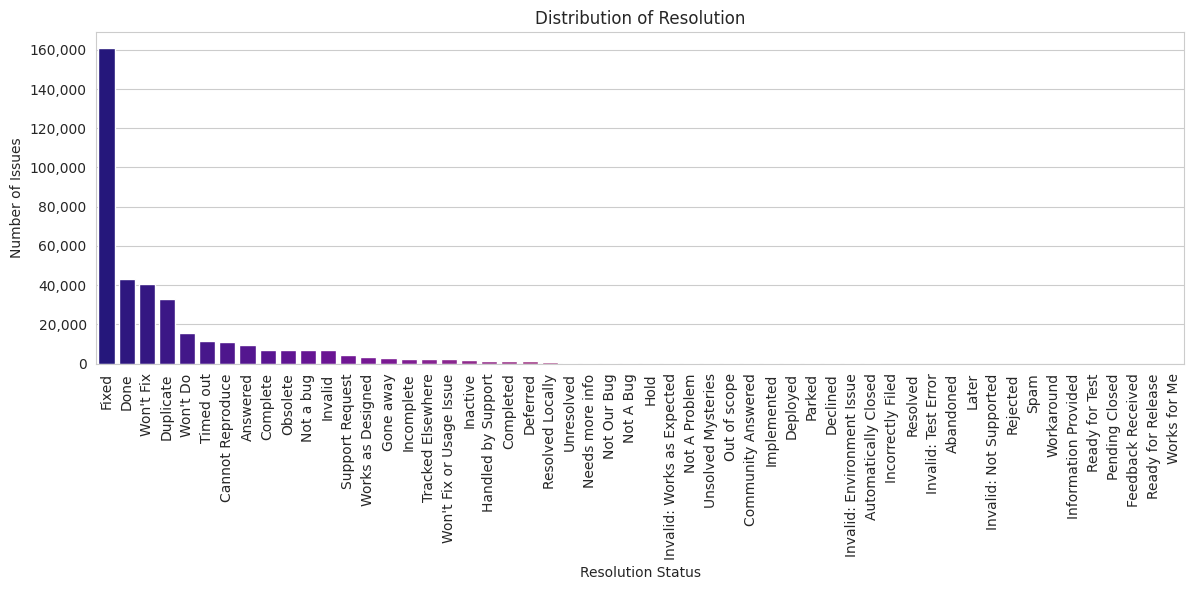

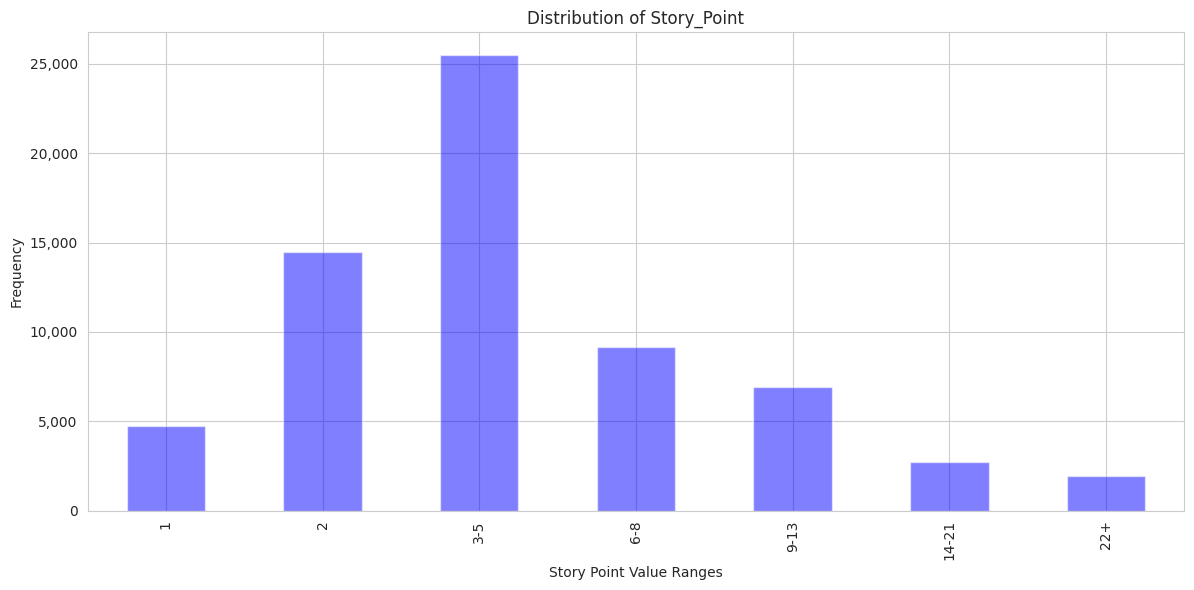

In [13]:
features = [
    {'name': 'Type', 'label': 'Issue Type', 'palette': 'deep'},
    {'name': 'Priority', 'label': 'Priority Level', 'palette': 'viridis'},
    {'name': 'Status', 'label': 'Issue Status', 'palette': 'coolwarm'},
    {'name': 'Resolution', 'label': 'Resolution Status', 'palette': 'plasma'},
    {'name': 'Story_Point', 'label': 'Story Point Value Ranges', 'palette': 'magma'}
]

for feature in features:
    plot_feature_distribution(data=data, feature=feature)

In [19]:
unique_list = list(data['Resolution'].unique())
unique_list

[nan,
 'Complete',
 'Invalid',
 'Works as Designed',
 'Deferred',
 "Won't Fix",
 'Cannot Reproduce',
 'Incomplete',
 'Duplicate',
 'Fixed',
 'Done',
 'Not A Bug',
 'Automatically Closed',
 'Parked',
 'Out of scope',
 "Won't Do",
 'Resolved',
 'Not A Problem',
 'Implemented',
 'Information Provided',
 'Later',
 'Abandoned',
 'Feedback Received',
 'Workaround',
 'Works for Me',
 'Pending Closed',
 'Not Our Bug',
 'Needs more info',
 'Hold',
 'Tracked Elsewhere',
 'Handled by Support',
 'Obsolete',
 'Not a bug',
 'Support Request',
 'Answered',
 'Timed out',
 'Resolved Locally',
 'Unsolved Mysteries',
 'Incorrectly Filed',
 'Deployed',
 'Spam',
 'Invalid: Works as Expected',
 'Invalid: Environment Issue',
 'Invalid: Test Error',
 'Invalid: Not Supported',
 'Ready for Test',
 'Ready for Release',
 'Community Answered',
 'Declined',
 'Gone away',
 'Inactive',
 'Completed',
 "Won't Fix or Usage Issue",
 'Rejected',
 'Unresolved']

In [29]:
data[data['ID'] == 66]['Resolution']

1    NaN
Name: Resolution, dtype: object